In [4]:
import numpy as np
import pandas as pd
import pickle
#from build_database import flux_obj
from scipy import interpolate
import matplotlib.pyplot as plt
import os
import itertools
import random
import os
%matplotlib inline
# Autoload changes made in external editor:
%load_ext autoreload
%autoreload 2

# --------------- Latex Plot Beautification --------------------------
fig_width_pt = 650.0  # Get this from LaTeX using \showthe\columnwidth
inches_per_pt = 1.0/72.27               # Convert pt to inch
golden_mean = (np.sqrt(5)-1.0)/2.0         # Aesthetic ratio
fig_width = fig_width_pt*inches_per_pt  # width in inches
fig_height = fig_width*golden_mean*2      # height in inches
fig_size =  [fig_width+1,fig_height+1]
params = {'backend': 'ps',
          'axes.labelsize': 14,
          'text.fontsize': 14,
          'legend.fontsize': 10,
          'xtick.labelsize': 10,
          'ytick.labelsize': 10,
          'text.usetex': False,
          'figure.figsize': fig_size}
plt.rcParams.update(params)
# --------------- Latex Plot Beautification --------------------------

/Users/austin/miniconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: text.fontsize is deprecated and replaced with font.size; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [ ]:
from mpl_toolkits.basemap.solar import daynight_terminator
from scipy.interpolate import interp1d
import datetime as dt
from coordinate_structure import transform_coords
import itertools

# months = np.arange(1,13)
# hours  = np.arange(1,25)

# for m, h in itertools.product(months, hours):

def get_daynight_mask(in_time, in_lat, in_lon, grid_lats, grid_lons):

    dnlons, dnlats, tau, dec = daynight_terminator(in_time, 0.1, grid_lons[0], grid_lons[-1])
    # print dnlons, dnlats


    dnt_coords_geom = transform_coords(dnlats, dnlons, np.zeros_like(dnlats),'geographic','geomagnetic')
    dnt_coords_geom = dnt_coords_geom[dnt_coords_geom[:,0].argsort(),:]


    # Find indices of termiator at input longitude:
    center_lon_ind = np.searchsorted(dnt_coords_geom[:,1], in_lon, 'left')
    center_lon_ind = min(center_lon_ind, len(dnt_coords_geom) - 1)
#     print center_lon_ind
#     print np.shape(dnt_coords_geom)
    dnt_flash_lon = dnt_coords_geom[center_lon_ind,1]


    # Find indices of terminator at input latitude:
    inds = np.where((dnt_coords_geom[:,0] < in_lat + 3) & (dnt_coords_geom[:,0] > in_lat - 3))

#     print inds
    # Set up output:
    out_mask = np.zeros_like(grid_lons)
    if len(inds[0]) > 1:
        # Happy region:
        lonz = dnt_coords_geom[inds,1]
        lon_min = np.min(lonz)
        lon_max = np.max(lonz)

        out_mask[grid_lons <= lon_min] = 1
        out_mask[grid_lons >= lon_max] = 1

    else:
        out_mask = np.ones_like(grid_lons)

    if dec > 0:
        if in_lat < dnt_coords_geom[center_lon_ind,0]:
            out_mask = 1 - out_mask
    else:
        if in_lat > dnt_coords_geom[center_lon_ind,0]:
            out_mask = 1 - out_mask

    return out_mask

in_time = dt.datetime(2015,12,1,23,0,0)
grid_lats = np.arange(-90,90, step=1)
grid_lons = np.arange(-180,180,step=1)

in_lat = 80
in_lon = 180



for ilat, ilon, m, h in itertools.product(months, hours):
    in_time = dt.datetime(2015, m, 1,h, 0, 0)
    om = get_daynight_mask(in_time, ilat, ilon, grid_lats, grid_lons)
    print np.shape(om)

# fig = plt.figure()
# ax = fig.add_subplot(111)
# ax.scatter(dnt_coords_geom[:,1],dnt_coords_geom[:,0])
# ax.scatter(dnt_coords_geom[inds,1],dnt_coords_geom[inds,0],color='red')
# ax.plot(grid_lons, out_mask*50 - 25)



[90]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[90]


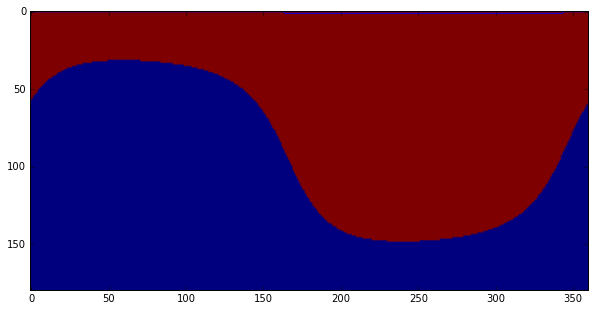

In [72]:
from mpl_toolkits.basemap.solar import daynight_terminator
import datetime as dt
from coordinate_structure import transform_coords


class daynite_scaler():
    def __init__(self, in_time):
#         self.in_time = in_time
#         self.grid_lats = grid_lats
#         self.grid_lons = grid_lons
        
        self.daynite_map = self.compute_at(in_time)

    def JulianDayFromDate(self, date,calendar='standard'):
        """
        creates a Julian Day from a 'datetime-like' object.  Returns the fractional
        Julian Day (resolution 1 second).

        if calendar='standard' or 'gregorian' (default), Julian day follows Julian 
        Calendar on and before 1582-10-5, Gregorian calendar after 1582-10-15.

        if calendar='proleptic_gregorian', Julian Day follows gregorian calendar.

        if calendar='julian', Julian Day follows julian calendar.

        Algorithm:

        Meeus, Jean (1998) Astronomical Algorithms (2nd Edition). Willmann-Bell,
        Virginia. p. 63
        """
        # based on redate.py by David Finlayson.
        year=date.year; month=date.month; day=date.day
        hour=date.hour; minute=date.minute; second=date.second
        # Convert time to fractions of a day
        day = day + hour/24.0 + minute/1440.0 + second/86400.0
        # Start Meeus algorithm (variables are in his notation)
        if (month < 3):
            month = month + 12
            year = year - 1
        A = int(year/100)
        jd = int(365.25 * (year + 4716)) + int(30.6001 * (month + 1)) + \
             day - 1524.5
        # optionally adjust the jd for the switch from 
        # the Julian to Gregorian Calendar
        # here assumed to have occurred the day after 1582 October 4
        if calendar in ['standard','gregorian']:
            if jd >= 2299170.5:
                # 1582 October 15 (Gregorian Calendar)
                B = 2 - A + int(A/4)
            elif jd < 2299160.5:
                # 1582 October 5 (Julian Calendar)
                B = 0
            else:
                raise ValueError('impossible date (falls in gap between end of Julian calendar and beginning of Gregorian calendar')
        elif calendar == 'proleptic_gregorian':
            B = 2 - A + int(A/4)
        elif calendar == 'julian':
            B = 0
        else:
            raise ValueError('unknown calendar, must be one of julian,standard,gregorian,proleptic_gregorian, got %s' % calendar)
        # adjust for Julian calendar if necessary
        jd = jd + B
        return jd 

        
    def epem(self, date):
        """
        input: date - datetime object (assumed UTC)
        ouput: gha - Greenwich hour angle, the angle between the Greenwich
               meridian and the meridian containing the subsolar point.
               dec - solar declination.
        """
        dg2rad = np.pi/180.
        rad2dg = 1./dg2rad
        # compute julian day from UTC datetime object.
        # datetime objects use proleptic gregorian calendar.
        jday = self.JulianDayFromDate(date,calendar='proleptic_gregorian')
        jd = np.floor(jday) # truncate to integer.
        # utc hour.
        ut = date.hour + date.minute/60. + date.second/3600.
        # calculate number of centuries from J2000
        t = (jd + (ut/24.) - 2451545.0) / 36525.
        # mean longitude corrected for aberration
        l = (280.460 + 36000.770 * t) % 360
        # mean anomaly
        g = 357.528 + 35999.050 * t
        # ecliptic longitude
        lm = l + 1.915 * np.sin(g*dg2rad) + 0.020 * np.sin(2*g*dg2rad)
        # obliquity of the ecliptic
        ep = 23.4393 - 0.01300 * t
        # equation of time
        eqtime = -1.915*np.sin(g*dg2rad) - 0.020*np.sin(2*g*dg2rad) \
                + 2.466*np.sin(2*lm*dg2rad) - 0.053*np.sin(4*lm*dg2rad)
        # Greenwich hour angle
        gha = 15*ut - 180 + eqtime
        # declination of sun
        dec = np.arcsin(np.sin(ep*dg2rad) * np.sin(lm*dg2rad)) * rad2dg
        return gha, dec

    def daynight_terminator(self, date, delta, lonmin, lonmax):
        """
        date is datetime object (assumed UTC).
        nlons is # of longitudes used to compute terminator."""
        dg2rad = np.pi/180.
        lons = np.arange(lonmin,lonmax+0.5*delta,delta,dtype=np.float32)
        # compute greenwich hour angle and solar declination
        # from datetime object (assumed UTC).
        tau, dec = self.epem(date)
        # compute day/night terminator from hour angle, declination.
        longitude = lons + tau
        lats = np.arctan(-np.cos(longitude*dg2rad)/np.tan(dec*dg2rad))/dg2rad
        return lons, lats, tau, dec

    def compute_at(self, in_time):
        # Get terminator
        delta = 1
        lons, lats, tau, dec = self.daynight_terminator(in_time, delta, -180, 179)
        
        # rotate to geomagnetic
        dnt_coords_geom = transform_coords(lats, lons, np.zeros_like(lats),'geographic','geomagnetic')
        lats = dnt_coords_geom[:,0]
        lons = dnt_coords_geom[:,1]
        lats2 = grid_lats
        nlons = len(lons); nlats = len(lats2)
        lons2, lats2 = np.meshgrid(lons,lats2)
        lats = lats[np.newaxis,:]*np.ones((nlats,nlons),dtype=np.float32)
        self.daynight = np.ones(lons2.shape, np.int8)
        if dec > 0: # NH summer
            self.daynight = np.where(lats2>lats,0,self.daynight)
        else: # NH winter
            self.daynight = np.where(lats2<lats,0,self.daynight)
    
        self.grid_lats = lats2[:,0]
        self.grid_lons = lons2[0,:]
        self.in_time   = in_time

    def nearest_index(self, grid, values):
        # Find closest index of a value in an array (i.e., quick quantize to grid value)
        idx = np.searchsorted(grid, values, side="left")
        idx = np.clip(idx, 0, len(grid) - 1)
        idx_l = np.clip(idx - 1, 0, len(grid) - 1)

        idx[abs(values - grid[idx_l]) < abs(values - grid[idx])] -= 1
        return idx
    
    def scaling_vector_at(self, lat):
        lat_ind = self.nearest_index(self.grid_lats, lat)
        print lat_ind
        return self.daynight[lat_ind,:].squeeze()
    
    
# # rotate to geomagnetic
# dnt_coords_geom = transform_coords(lats, lons, np.zeros_like(lats),'geographic','geomagnetic')
# lats = dnt_coords_geom[:,0]
# lons = dnt_coords_geom[:,1]
# # create day/night grid (1 for night, 0 for day)
# # lats2 = np.arange(-90,90,1,dtype=np.float32)
# lats2 = grid_lats
# nlons = len(lons); nlats = len(lats2)
# lons2, lats2 = np.meshgrid(lons,lats2)
# lats = lats[np.newaxis,:]*np.ones((nlats,nlons),dtype=np.float32)
# daynight = np.ones(lons2.shape, np.int8)
# if dec > 0: # NH summer
#     daynight = np.where(lats2>lats,0,daynight)
# else: # NH winter
#     daynight = np.where(lats2<lats,0,daynight)

# print np.shape(daynight)
# plt.imshow(daynight)


grid_lats = np.arange(-90,90)
grid_lons = np.arange(-180,180)

in_time = dt.datetime(2015,7,1,19,0,0)

dn_s = daynite_scaler(in_time)
# print dn_s.grid_lons
# print dn_s.grid_lats
print dn_s.scaling_vector_at([0])
plt.plot(dn_s.scaling_vector_at([0]))
# print np.shape(dn_s.daynight)
# print np.shape(dn_s.grid_lats)
# print np.shape(dn_s.grid_lons)
plt.imshow(dn_s.daynight)
# plt.plot(dn_s.grid_lons, dn_s.scaling_vector_at([0]))
# plt.pcolor(dn_s.grid_lons, dn_s.grid_lats, dn_s.daynight)
